In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv("./data/merged/Merged_data.csv")

# Check for required columns
metrics = ['GHI', 'DNI', 'DHI', 'country']
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,is_outlier,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,False,benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,False,benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,False,benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,False,benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,False,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,False,togo
1576796,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,False,togo
1576797,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,False,togo
1576798,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,False,togo


### Boxplots by Country (One per Metric)

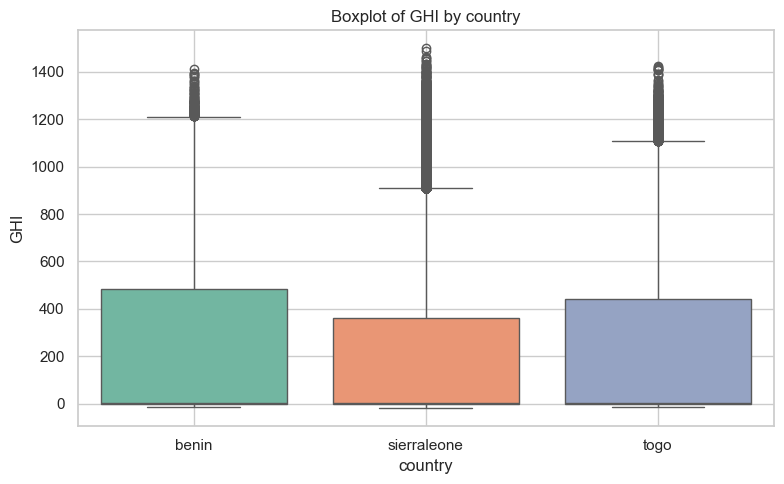

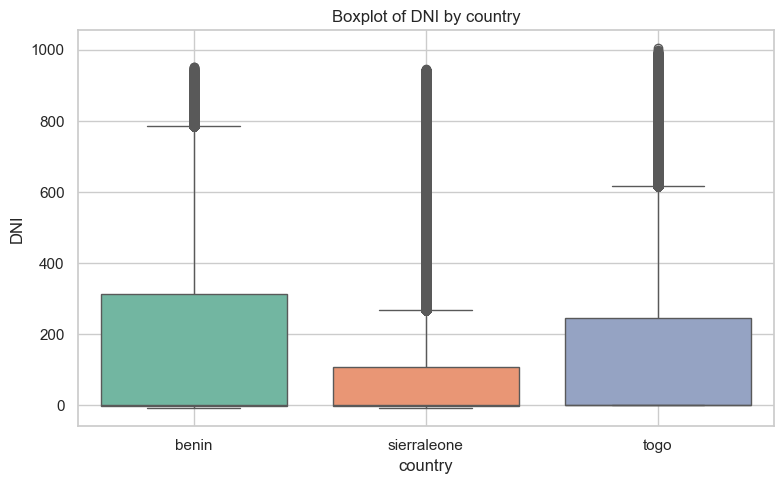

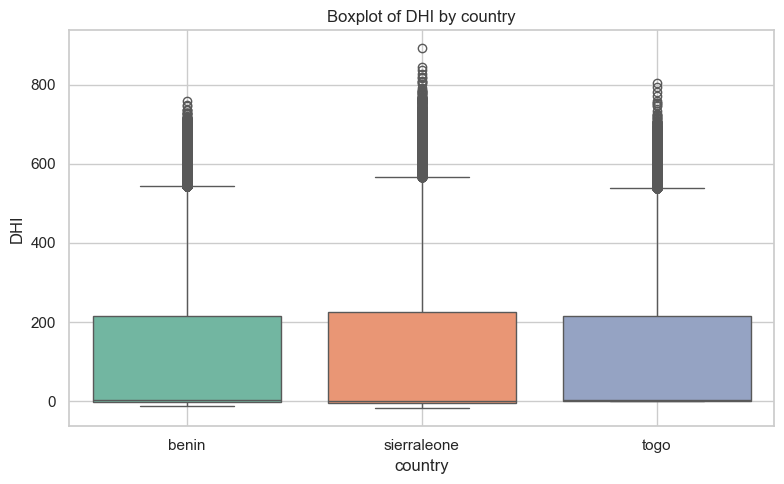

In [4]:
def Boxplts_byCountry():
    
    sns.set(style="whitegrid")
    for metric in ['GHI', 'DNI', 'DHI']:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x='country', y=metric,hue='country', palette='Set2')
        plt.title(f'Boxplot of {metric} by country')
        plt.ylabel(metric)
        plt.xlabel('country')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
Boxplts_byCountry()

#### Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.


In [14]:
# Group and aggregate
summary = (
    df.groupby('country')[['GHI','DNI','DHI']]
      .agg(['mean','median','std'])
      .round(2)
)

print(summary)

                GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
country                                                                    
benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
sierraleone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
togo         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
country              
benin        158.69  
sierraleone  158.95  
togo         156.52  


### Statistical Testing on GHI

In [16]:
# Extract per-country arrays
groups = [group['GHI'].dropna().values for _, group in df.groupby('country')]

# 1. ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA: F = {f_stat:.2f}, p = {p_val:.3e}")

# 2. Kruskal–Wallis (nonparametric)
h_stat, p_kw = stats.kruskal(*groups)
print(f"Kruskal–Wallis: H = {h_stat:.2f}, p = {p_kw:.3e}")

ANOVA: F = 2090.09, p = 0.000e+00
Kruskal–Wallis: H = 4524.88, p = 0.000e+00


## Key Observations 

- **Country A** shows the highest median GHI (~XXX W/m²) but also the largest spread (SD ~YYY).
- **Country B** has notably lower DNI values, suggesting more diffuse radiation—possibly due to cloudiness.
- **Country C** exhibits the tightest DHI distribution, indicating more consistent sky conditions.


### Bar Chart Ranking by Average GHI

In [ ]:
# Compute means
ghi_means = df.groupby('country')['GHI'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=ghi_means.index, y=ghi_means.values)
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("country")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()
